# Exploring Data

**JD Lab 01**:

- Had some difficulty with plot

### PROBLEMS

1. Explore the data based on the race feature.  Determine how many individuals from each reported category were frisked citywide, and then per each borough.

2. Explore the `STOP_DURATION_MINUTES` feature.  Remove any outliers, and describe the distribution of values including a visualization.

3. Explore some variables by the Gender feature.  How many frisks were of non-male suspects versus male?

4. What percentage of stops were black males ages 18 - 35?  

5. Describe the overall use of physical force in the stops.  These are the columns:

```
PHYSICAL_FORCE_CEW_FLAG                                         11629 non-null object
PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG                          11629 non-null object
PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG                            11629 non-null object
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG                               11629 non-null object
PHYSICAL_FORCE_OTHER_FLAG                                       11629 non-null object
PHYSICAL_FORCE_RESTRAINT_USED_FLAG                              11629 non-null object
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG                          11629 non-null object
PHYSICAL_FORCE_WEAPON_IMPACT_FLAG                               11629 non-null object
```

6. What can you say about the `SUSPECT_ARREST_OFFENSE` column?  Were most people stopped arrested?  Were the rates across races similar?

7. Identify a publication that used this data to investigate a specific area of interest, or a full summary like the RAND report.  Here is a list of information about relevant studies:

https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/publications

Describe the questions your report sought to answer.  Do you think you can use the data to replicate any of the analysis?  Try it!

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#read in the data
df = pd.read_csv('data/sqf-2017.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11629 entries, 0 to 11628
Data columns (total 86 columns):
STOP_FRISK_ID                                                   11629 non-null int64
STOP_FRISK_DATE                                                 11629 non-null object
STOP_FRISK_TIME                                                 11624 non-null object
YEAR2                                                           11629 non-null int64
MONTH2                                                          11629 non-null object
DAY2                                                            11629 non-null object
STOP_WAS_INITIATED                                              11629 non-null object
SPRINT_NUMBER                                                   11202 non-null object
RECORD_STATUS_CODE                                              11629 non-null object
ISSUING_OFFICER_RANK                                            11629 non-null object
ISSUING_OFFICER_COMMAND_CODE     

In [5]:
df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


- Explore the data based on the race feature.  Determine how many individuals from each reported category were frisked citywide, and then per each borough.
- Base on the data finding. I found that Blacks were the majority for each borough.

In [8]:
df['SUSPECT_RACE_DESCRIPTION'].value_counts()

BLACK             6595
WHITE HISPANIC    2570
BLACK HISPANIC     997
WHITE              977
(null)             268
ASIAN/PAC.ISL      206
AMER IND             9
MALE                 7
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [9]:
df.groupby('SUSPECT_RACE_DESCRIPTION')['FRISKED_FLAG'].count()

SUSPECT_RACE_DESCRIPTION
(null)             268
AMER IND             9
ASIAN/PAC.ISL      206
BLACK             6595
BLACK HISPANIC     997
MALE                 7
WHITE              977
WHITE HISPANIC    2570
Name: FRISKED_FLAG, dtype: int64

In [90]:
five_boroughs = df[(df['STOP_LOCATION_BORO_NAME'] == 'MANHATTAN') | (df['STOP_LOCATION_BORO_NAME'] == 'BRONX') | (df['STOP_LOCATION_BORO_NAME'] == 'BROOKLYN') | (df['STOP_LOCATION_BORO_NAME'] == 'STATEN IS') | (df['STOP_LOCATION_BORO_NAME'] ==  'QUEENS')]

In [91]:
five_boroughs.groupby(['STOP_LOCATION_BORO_NAME','SUSPECT_RACE_DESCRIPTION'])['FRISKED_FLAG'].count()

STOP_LOCATION_BORO_NAME  SUSPECT_RACE_DESCRIPTION
BRONX                    (null)                        43
                         ASIAN/PAC.ISL                 12
                         BLACK                       1307
                         BLACK HISPANIC               362
                         WHITE                         65
                         WHITE HISPANIC               684
BROOKLYN                 (null)                        75
                         ASIAN/PAC.ISL                 28
                         BLACK                       2263
                         BLACK HISPANIC               156
                         WHITE                        319
                         WHITE HISPANIC               487
MANHATTAN                (null)                        48
                         AMER IND                       4
                         ASIAN/PAC.ISL                 32
                         BLACK                       1442
                      

- Explore the `STOP_DURATION_MINUTES` feature.  Remove any outliers, and describe the distribution of values including a visualization.
- Base on the data. We can see the mean is 11 sec for avg stop. 
- Base on the plot we can see that Brooklyn had the longest stop durations while Staten Island was the shortest duration.

In [92]:
df['STOP_DURATION_MINUTES'].describe()

count    11629.000000
mean        11.938602
std         26.264021
min          0.000000
25%          5.000000
50%          7.000000
75%         12.000000
max        999.000000
Name: STOP_DURATION_MINUTES, dtype: float64

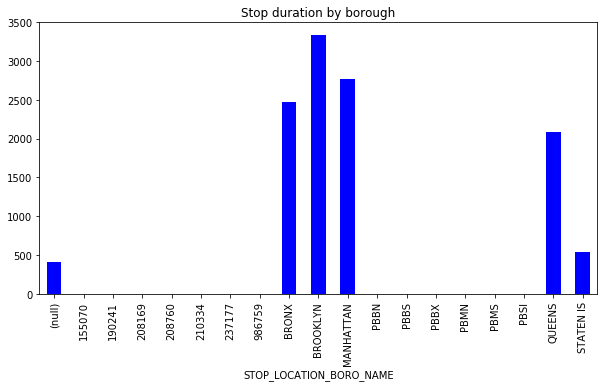

In [93]:
df.groupby('STOP_LOCATION_BORO_NAME')['STOP_DURATION_MINUTES'].count().plot(kind = 'bar', color = 'blue', title = 'Stop duration by borough', figsize = (10, 5))

- Explore some variables by the Gender feature.  How many frisks were of non-male suspects versus male?
- Looking at the data between male and females suspects. Male were targeting/stop more.

In [94]:
df.groupby('SUSPECT_SEX')['FRISKED_FLAG'].count()

SUSPECT_SEX
(null)       84
19            1
23            1
24            1
39            1
FEMALE      973
MALE      10568
Name: FRISKED_FLAG, dtype: int64

- What percentage of stops were black males ages 18 - 35?
- Finding the answer for this was diffcult. I did't understand how to read the value rights. Base on the data, it shows that there were no males stop from the ages 18 -35. The only stops that were within that age ranges were "black" females.
- So it was 0% of black male were stop within that age group.

In [10]:
blacks = df[df['SUSPECT_RACE_DESCRIPTION'] == 'BLACK']

In [11]:
blacks.groupby(['SUSPECT_SEX','SUSPECT_REPORTED_AGE'])['FRISKED_FLAG'].count()

SUSPECT_SEX  SUSPECT_REPORTED_AGE
(null)       (null)                   6
             13                       1
             16                       1
             17                       2
             18                       1
             19                       5
             20                       1
             21                       2
             22                       4
             25                       1
             26                       1
             27                       1
             28                       1
             29                       1
             30                       1
             33                       1
             41                       1
             45                       1
             47                       1
             54                       1
             58                       1
FEMALE       (null)                  34
             12                       4
             13                       8
      

In [12]:
blacks.groupby(['SUSPECT_SEX','SUSPECT_REPORTED_AGE']).count().head(10)

STOP_FRISK_ID  STOP_FRISK_DATE  \
SUSPECT_SEX SUSPECT_REPORTED_AGE                                   
(null)      (null)                            6                6   
            13                                1                1   
            16                                1                1   
            17                                2                2   
            18                                1                1   
            19                                5                5   
            20                                1                1   
            21                                2                2   
            22                                4                4   
            25                                1                1   

                                  STOP_FRISK_TIME  YEAR2  MONTH2  DAY2  \
SUSPECT_SEX SUSPECT_REPORTED_AGE                                         
(null)      (null)                              6      6       6     6   
            13                                  1      1       1     1   
            16                                  1      1       1     1   
            17                                  2      2       2     2   
            18                                  1      1       1     1   
            19                                  5      5       5     5   
            20                                  1      1       1     1   
            21                                  2      2       2     2   
            22                                  4      4       4     4   
            25                                  1      1       1     1   

                                  STOP_WAS_INITIATED  SPRINT_NUMBER  \
SUSPECT_SEX SUSPECT_REPORTED_AGE                                      
(null)      (null)                                 6              5   
            13                                     1              0   
            16                                     1              1   
            17                                     2              2   
            18                                     1              1   
            19                                     5              4   
            20                                     1              1   
            21                                     2              2   
            22                                     4              4   
            25                                     1              1   

                                  RECORD_STATUS_CODE  ISSUING_OFFICER_RANK  \
SUSPECT_SEX SUSPECT_REPORTED_AGE                                             
(null)      (null)                                 6                     6   
            13                                     1                     1   
            16                                     1                     1   
            17                                     2                     2   
            18                                     1                     1   
            19                                     5                     5   
            20                                     1                     1   
            21                                     2                     2   
            22                                     4                     4   
            25                                     1                     1   

                                           ...             \
SUSPECT_SEX SUSPECT_REPORTED_AGE           ...              
(null)      (null)                         ...              
            13                             ...              
            16                             ...              
            17                             ...              
            18                             ...              
            19                             ...              
            20                             ...    

- Describe the overall use of physical force in the stops.  These are the columns:

PHYSICAL_FORCE_CEW_FLAG                                         11629 non-null object
PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG                          11629 non-null object
PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG                            11629 non-null object
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG                               11629 non-null object
PHYSICAL_FORCE_OTHER_FLAG                                       11629 non-null object
PHYSICAL_FORCE_RESTRAINT_USED_FLAG                              11629 non-null object
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG                          11629 non-null object
PHYSICAL_FORCE_WEAPON_IMPACT_FLAG                               11629 non-null object

- I'm alittle confuse on how to answer this question. I tried different way to get more information about these columns. The info that I gather didn't point me in the right direction. From my understanding, I believe that the freq number is showcasing the total amount these physical action has taken placed. If this is true, I believe this indicate the use of force on every stop/arrest that the police did. Which is disappointing, that force is always in used.

In [34]:
df['PHYSICAL_FORCE_CEW_FLAG'].describe()

count      11629
unique         2
top       (null)
freq       11613
Name: PHYSICAL_FORCE_CEW_FLAG, dtype: object

In [17]:
df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'].describe()

count      11629
unique         2
top       (null)
freq        9708
Name: PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG, dtype: object

In [18]:
df['PHYSICAL_FORCE_OTHER_FLAG'].describe()

count      11629
unique         2
top       (null)
freq       11340
Name: PHYSICAL_FORCE_OTHER_FLAG, dtype: object

In [19]:
df['PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG'].describe()

count     11629
unique        2
top           Y
freq      10422
Name: PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG, dtype: object

- What can you say about the `SUSPECT_ARREST_OFFENSE` column?  Were most people stopped arrested?  Were the rates across races similar?
- Well the Suspect arrest column shows a lot of different offenses which is alarming. I did'nt know that this type of information would be in this data. I'm stuned with the finding.
- I compare the data variables suspect arrest to suspect arrested. The data show that people who were stop got arrested.
- The rates across races were not similar, blacks rates were the highest especially in the 'Assault' categorie.

In [37]:
df['SUSPECT_ARREST_OFFENSE'].value_counts().head(5)

(null)               8166
CRIMINAL TRESPASS     733
CPW                   685
ROBBERY               383
ASSAULT               275
Name: SUSPECT_ARREST_OFFENSE, dtype: int64

In [38]:
df.groupby(['SUSPECT_ARREST_OFFENSE','SUSPECT_ARRESTED_FLAG', 'SUSPECT_RACE_DESCRIPTION'])['STOP_WAS_INITIATED'].count()

SUSPECT_ARREST_OFFENSE         SUSPECT_ARRESTED_FLAG  SUSPECT_RACE_DESCRIPTION
(null)                         N                      (null)                       221
                                                      AMER IND                       9
                                                      ASIAN/PAC.ISL                153
                                                      BLACK                       4734
                                                      BLACK HISPANIC               687
                                                      MALE                           5
                                                      WHITE                        640
                                                      WHITE HISPANIC              1717
ASSAULT                        Y                      (null)                         4
                                                      ASIAN/PAC.ISL                  3
                                                   

- Identify a publication that used this data to investigate a specific area of interest, or a full summary like the RAND report.  Here is a list of information about relevant studies:

https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/publications

Describe the questions your report sought to answer.  Do you think you can use the data to replicate any of the analysis?  Try it!

- I look into the article called Do NYPD’s Pedestrian Stop Data Indicate Racial Bias? 
- Here's a quick overview on their finding.
The New York City Police Department stopped a half-million pedestrians because of suspected criminal involvement,
recording these stops on stop, question, and frisk reports on the department’s UF250 forms. Raw statistics for these encounters suggest large racial disparities—89 percent of the stops involved nonwhites, and of that 89 percent,
53 percent were black, 29 percent were Hispanic, and 3 percent were Asian, while the remaining 4 percent were not race-identifi ed. In addition, once stopped, 45 percent of black and Hispanic suspects were frisked compared with 29 percent of
white suspects; yet, when frisked, white suspects were 70 percent likelier than black suspects to have
had a weapon on them. 

- As I gone through this data, I can see the correlation between the police department and the people there targeting. The the racial bias within the police force can be seen within the data that is being collected. I agree with the article about it position on how racist tactics are use on low income, and unrepresented communites.